In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%cd ~/hdstats

/home/251/dxr251/hdstats


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import hdstats

from mpl_toolkits.mplot3d import axes3d

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

np.set_printoptions(precision=4, suppress=True, linewidth=120)
plt.style.use('./docs/hdstats.mplstyle')

## Wishart random matrices

### Joint distribution of eigenvalues

In [9]:
Sigma = np.array([[1,1/3],[1/3,1]])
print(Sigma)

n = 10

[[1.     0.3333]
 [0.3333 1.    ]]


In [10]:
wd = hdstats.Wishart(df=n, scale=Sigma)

X = wd.rvs(10000)
Ls = np.stack([np.linalg.eig(x)[0] for x in X], axis=-1)

/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.33. Returning /usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf.
  UserWarning)


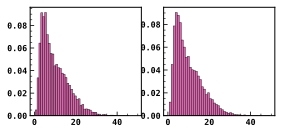

In [11]:
fig, axes = plt.subplots(1, Ls.shape[0], figsize=(2.2*Ls.shape[0],2), sharex=True)

for i in range(Ls.shape[0]):
    axes[i].hist(Ls[i], 50, density=True)

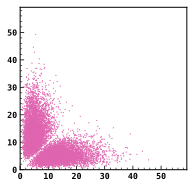

In [12]:
plt.figure(figsize=(3,3))
plt.scatter(Ls[0], Ls[1])
xmax = 1.2*np.max(Ls)
plt.xlim((0,xmax))
plt.ylim((0,xmax));

In [13]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

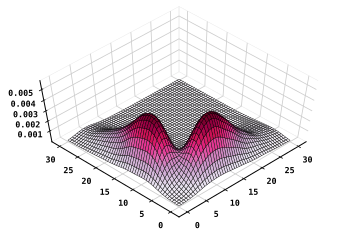

In [14]:
xmax = 30

x = np.linspace(0, xmax)
y = np.linspace(0, xmax)
X, Y = np.meshgrid(x, y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

kde = KDEMultivariate(data=[Ls[0],Ls[1]], var_type='cc')
Z = kde.pdf(pos.reshape((-1,2))).reshape(X.shape)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.rcParams['image.cmap'])

ax.grid(True)
ax.xaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.yaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(elev=60, azim=-135)
ax.dist=10

## Diagonal elements of a Wishart random matrix

In [15]:
Sigma = np.array([[1,1/3],[1/3,1]])
print(Sigma)

n = 10

[[1.     0.3333]
 [0.3333 1.    ]]


In [16]:
wd = hdstats.Wishart(df=n, scale=Sigma)

X = wd.rvs(10000)
Ds = np.stack([np.diag(x) for x in X], axis=-1) # diagonals!

/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf.
  UserWarning)
/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=italic:variant=normal:weight

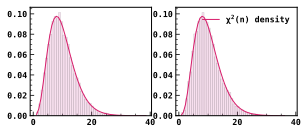

In [18]:
fig, axes = plt.subplots(1, Ds.shape[0], figsize=(2.4*Ds.shape[0],2), sharex=True)

for i in range(Ls.shape[0]):
    _, bins, _ = axes[i].hist(Ds[i], 50, density=True, alpha=0.2)
    cs = hdstats.ChiSquared(df=n)
    axes[i].plot(bins, cs.pdf(bins), label='$\chi^2(n)$ density')
plt.legend()

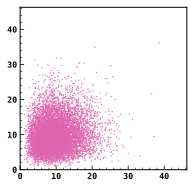

In [19]:
plt.figure(figsize=(3,3))
plt.scatter(Ds[0], Ds[1])
xmax = 1.2*np.max(Ds)
plt.xlim((0,xmax))
plt.ylim((0,xmax));

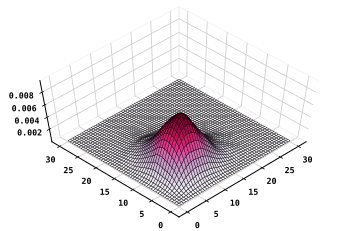

In [20]:
xmax = 30

x = np.linspace(0, xmax)
y = np.linspace(0, xmax)
X, Y = np.meshgrid(x, y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

kde = KDEMultivariate(data=[Ds[0], Ds[1]], var_type='cc')
Z = kde.pdf(pos.reshape((-1,2))).reshape(X.shape)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.rcParams['image.cmap'])

ax.grid(True)
ax.xaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.yaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(elev=60, azim=-135)
ax.dist=10

### Cholesky decomposition

In [21]:
Sigma = np.eye(4)
print(Sigma)

n = 10

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [22]:
wd = hdstats.Wishart(df=n, scale=Sigma)

X = wd.rvs(10000)
Cs = np.stack([np.diag(np.linalg.cholesky(x))**2 for x in X], axis=-1)

In [23]:
Cs.shape

(4, 10000)

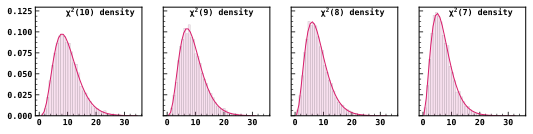

In [25]:
fig, axes = plt.subplots(1, Cs.shape[0], figsize=(2.2*Cs.shape[0],2), sharex=True, sharey=True)

for i in range(Cs.shape[0]):
    _, bins, _ = axes[i].hist(Cs[i], 40, density=True, alpha=0.2)
    cs = hdstats.ChiSquared(df=n-i)
    axes[i].plot(bins, cs.pdf(bins))
    axes[i].text(bins[-2], 0.12, f'$\chi^2({n-i})$ density', horizontalalignment='right', size='small')

We see the components are uncorrelated.

In [26]:
np.corrcoef(Cs[0], Cs[1])

array([[ 1.   , -0.006],
       [-0.006,  1.   ]])

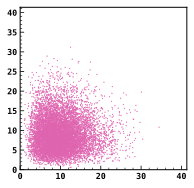

In [27]:
plt.figure(figsize=(3,3))
plt.scatter(Cs[0], Cs[1])
xmax = 1.2*np.max(Cs)
plt.xlim((0,xmax))
plt.ylim((0,xmax));